<h2>Data Analytics- notebook</h2>

<h4><b>ML Engineer Salaries in 2024</b></h4>

<h4><b>Description & Data format:</b></h4> <i> source: https://www.kaggle.com/datasets/chopper53/machine-learning-engineer-salary-in-2024/discussion </i>

work_year: The year in which the salary data was collected (e.g., 2024).<br>
experience_level: The level of experience of the employee (e.g., MI for Mid-Level).<br>
employment_type: The type of employment (e.g., FT for Full-Time).<br>
job_title: The title of the job (e.g., Data Scientist).<br>
salary: The salary amount.<br>
salary_currency: The currency in which the salary is denominated (e.g., USD for US Dollars).<br>
salary_in_usd: The salary amount converted to US Dollars.<br>
employee_residence: The country of residence of the employee (e.g., AU for Australia).<br>
remote_ratio: The ratio indicating the level of remote work (0 for no remote work).<br>
company_location: The location of the company (e.g., AU for Australia).<br>
company_size: The size of the company (e.g., S for Small).

<h4><b>Data source (url):</b></h4>

https://www.kaggle.com/datasets/chopper53/machine-learning-engineer-salary-in-2024/data

<h3><b>Code: importing modules, custom functions and loading the data</b></h3>

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


# Read the CSV, turn it to DF and print the head
ml_salaries_data = pd.read_csv('salaries.csv')
ml_salaries_df = pd.DataFrame(ml_salaries_data)
ml_salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


<h3><b>Code: Data clean-up procedure</b></h3>

Remove duplicate rows for purity of the data.

In [14]:
ml_salaries_df.drop_duplicates(inplace=True) # inplace modifies the current df rather than creating a new one.

Remove salary column, it's identical to salary_in_usd column

In [15]:
ml_salaries_df.drop(columns=['salary'], inplace=True)

Convert possible float data types to integers

In [7]:
ml_salaries_df['salary_in_usd'] = ml_salaries_df['salary_in_usd'].astype(int)

Remove rows if there are empty data

In [16]:
ml_salaries_df.dropna(inplace=True)

Check for outliers in salaries

In [17]:
# Calculate the outliers with z-score and 3 is the threshold so we are identifying the outliers with z-score higher than 3.
z = np.abs(stats.zscore(ml_salaries_df['salary_in_usd']))
threshold = 3
outliers = ml_salaries_df[z > threshold]
ml_salaries_df = ml_salaries_df[z <= threshold]

In [18]:
ml_salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,USD,240000,US,0,US,M


<h3><b>Code: Data analysis</b></h3>

Salary distribution by company size, how the company size affects on salaries?

[Text(0.5, 1.0, 'Salaries by Companies Size'),
 Text(0.5, 0, 'Company Size'),
 Text(0, 0.5, 'Salary in USD')]

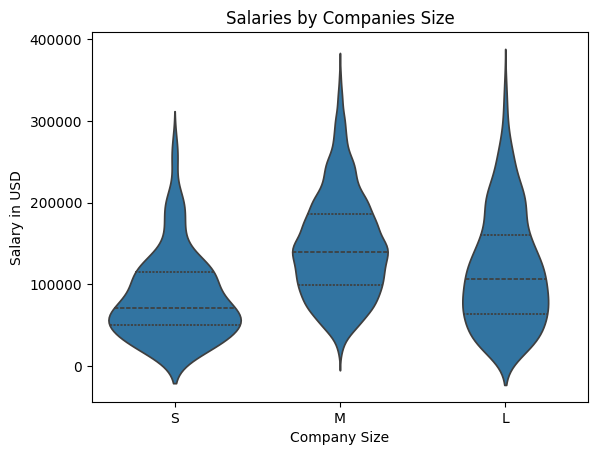

In [21]:
f_plot = sns.violinplot(x='company_size', y='salary_in_usd', data=ml_salaries_df, inner="quartile")
f_plot.set(title='Salaries by Companies Size', xlabel='Company Size', ylabel='Salary in USD')


<i>Conclusion (Salaries by Companies Size):<br>
Smaller companies have more low-end salaries, but mid and large sized have more balanced salary distribution.</i>

What is the median salary by the company size?

[Text(0.5, 1.0, 'Median Salary by Size'),
 Text(0.5, 0, 'Company Size'),
 Text(0, 0.5, 'Median Salary')]

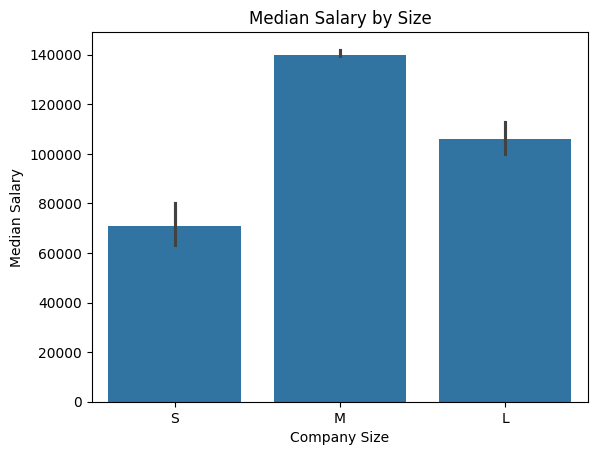

In [22]:
median_salary_by_company_size = ml_salaries_df.groupby('company_size')['salary_in_usd'].median().reset_index()

s_plot = sns.barplot(x='company_size', y='salary_in_usd', data=ml_salaries_df, estimator=np.median)
s_plot.set(title='Median Salary by Size', xlabel='Company Size', ylabel='Median Salary')

<i>Conclusion (Median Salary by Company Size):<br>
Best value you can get is to join mid-sized company, mid-sized companies are most likely looking to grow and already can afford to pay higher salaries. <br>
Larger the company is, the more well-known and wanted it is, so it can compete via experience and security and doesn't have to offer that large of salaries.</i>

What titles holds the best salaries? Top 5

[Text(0.5, 1.0, 'Best Salaries by Job Titles'),
 Text(0.5, 0, 'Titles'),
 Text(0, 0.5, 'Median Salary')]

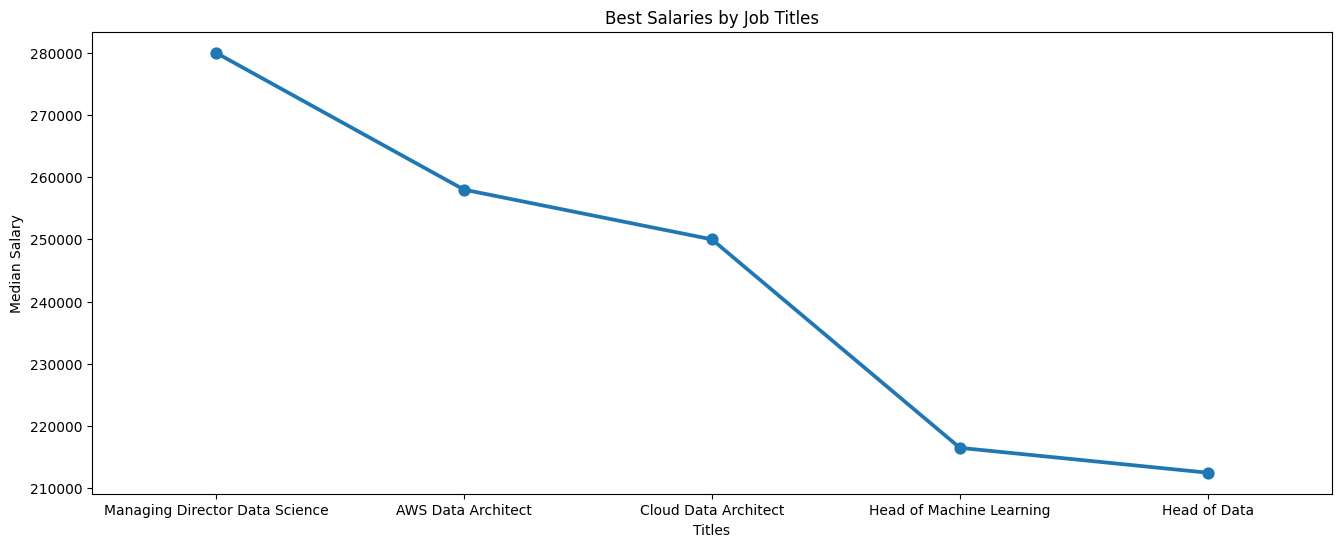

In [38]:
import matplotlib.pyplot as plt
job_title_salary = ml_salaries_df.groupby('job_title')['salary_in_usd'].median().reset_index()

top_5 = job_title_salary.sort_values(by='salary_in_usd', ascending=False).head(5)
plt.figure(figsize=(16, 6))
t_plot = sns.pointplot(x='job_title', y='salary_in_usd', data=top_5)
t_plot.set(title='Best Salaries by Job Titles', xlabel='Titles', ylabel='Median Salary')


<i>Conclusion (Best Salaries by Job Titles):<br>
Best salaries are held by people in the managing or architect positions, which requires years of experience.</i>

How company size and experience level affects to the salaries?

[Text(0.5, 1.0, 'Correlations between Experience Level and Company Size to The Salaries'),
 Text(0.5, 0, 'Company Size'),
 Text(0, 0.5, 'Salary')]

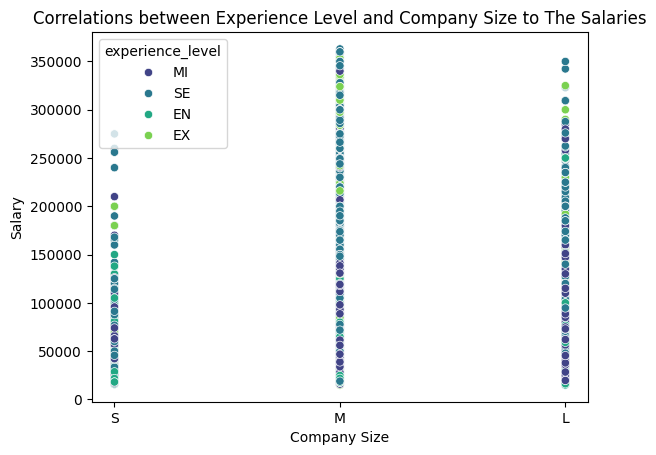

In [47]:
d_plot = sns.scatterplot(data=ml_salaries_df, x='company_size', y='salary_in_usd', hue='experience_level', palette='viridis')
d_plot.set(title='Correlations between Experience Level and Company Size to The Salaries', xlabel='Company Size', ylabel='Salary')


<i>Conclusion (Correlations between Experience Level and Company Size to The Salaries):<br>
Scatterplot reveals that there are some anomalies but mostly executives and senior-levels dominate the payfield.</i>

How does the company location affect the salaries?

[Text(0.5, 1.0, 'Salaries by Company Location'),
 Text(0.5, 0, 'Median Salary'),
 Text(0, 0.5, 'Country')]

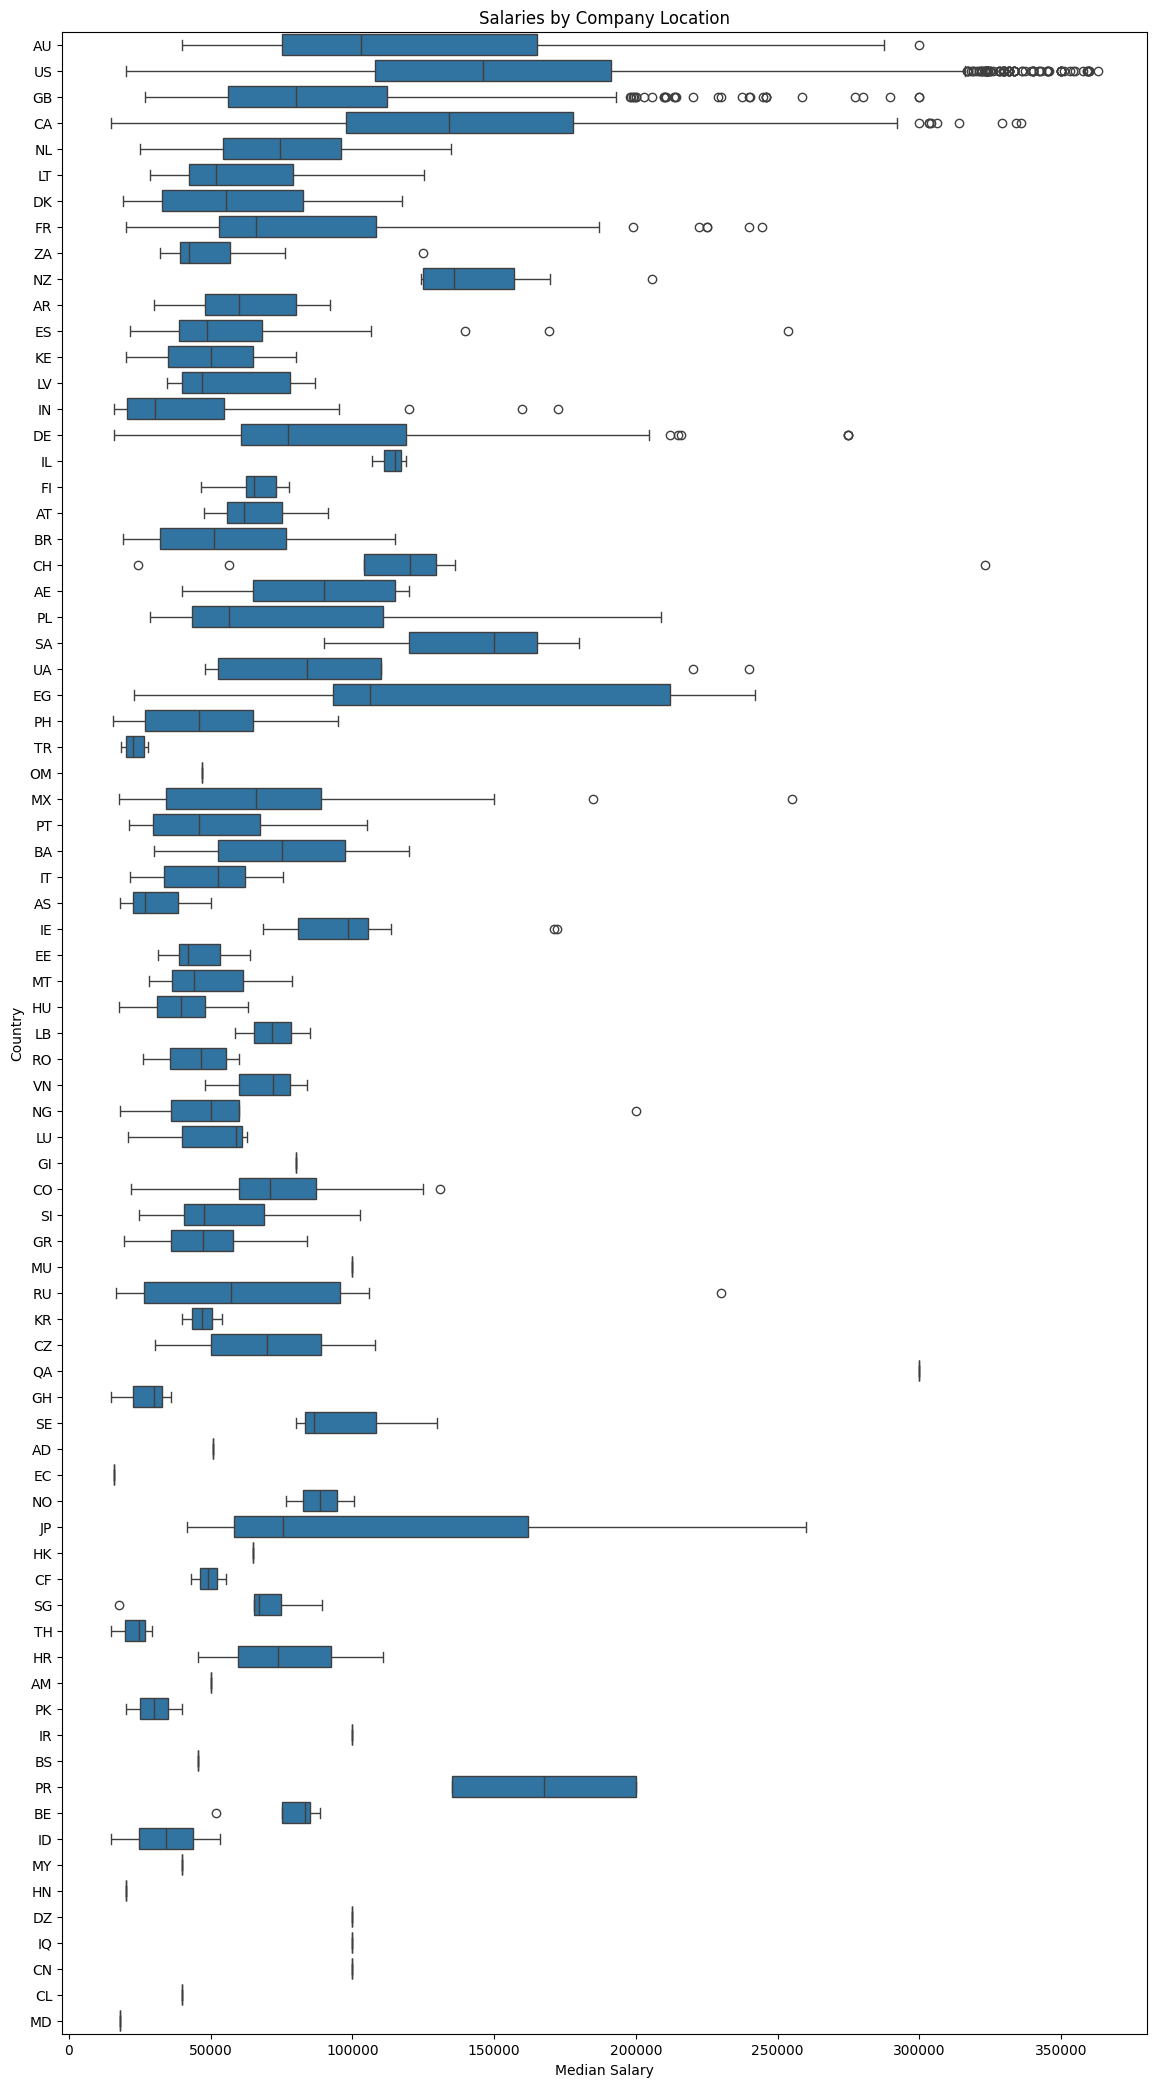

In [48]:
salaries_company_location = ml_salaries_df.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False)
plt.figure(figsize=(14, 26))
x_plot = sns.boxplot(x='salary_in_usd', y='company_location', data=ml_salaries_df)
x_plot.set(title='Salaries by Company Location', xlabel='Median Salary', ylabel='Country')


<i>Conclusion (Salaries by Company Location):<br>
More developed countries have higher median salaries, which reflects especially on better job markets and ofcourse higher cost of living.<br>
Less economically stable countries shows lower salaries, which indicates that there are less demand OR supply for the high paying ML jobs.</i> 

<h3><b>Results and summary:</b></h3>

Salaries for Machine Learning Engineers move as in other fields; the higher your status (experience), the better salary you receive. Somewhat surprisingly, large companies are not necessarily the best place in terms of salary, as mid-sized companies may offer better income levels for the middle tier. Job titles did not provide any other indication except what is known in other fields, that the best salaries are found in management positions. Developed and big countries like US, UK and AU offer higher median salaries than developing + smaller countries.

<h3><b>Ideas for further improvements:</b></h3>

The dataset could've improved with having some comparisons to other fields in ICT or even in whole different engineering field. It would've been nice to see how the median salaries compare. <br>

Also the dataset painfully needs one factor: AGE! + generally more detailed data. For example the experience levels is vague, numeral data would've been much more useful and would've given more insights.